In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.ticker as tkr
%matplotlib inline

#Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 

In [2]:
fuel_df=pd.read_excel(r'c:\Users\Phuong.Ngo\OneDrive - DSV\HP Working Folder\03. Reporting\00. Data for Reporting\01. Fuel Price\Vietnam_Fuel_Price.xlsx')
fuel_df_reg1 = fuel_df[fuel_df['Regional']=='Vùng 1']
fuel_df_reg1.tail()

,Unnamed: 0,Date,Regional,RON 95-IV,RON 95-III,E5 RON 92-II,"Diesel Oil 0,001S-V","Diesel Oil 0,05S-II"
144,NaN,2018-03-08,Vùng 1,20180,19980,18340,15760,15710
146,NaN,2018-02-21,Vùng 1,20180,19980,18340,15760,15710
148,NaN,2018-02-03,Vùng 1,20580,20380,18670,16000,15950
150,NaN,2018-01-19,Vùng 1,20580,20380,18670,16000,15950
152,NaN,2018-01-04,Vùng 1,20290,20090,18240,15570,15520


Text(0.5, 1.0, 'Fuel Price Region 1 Vietnam 2019-201')

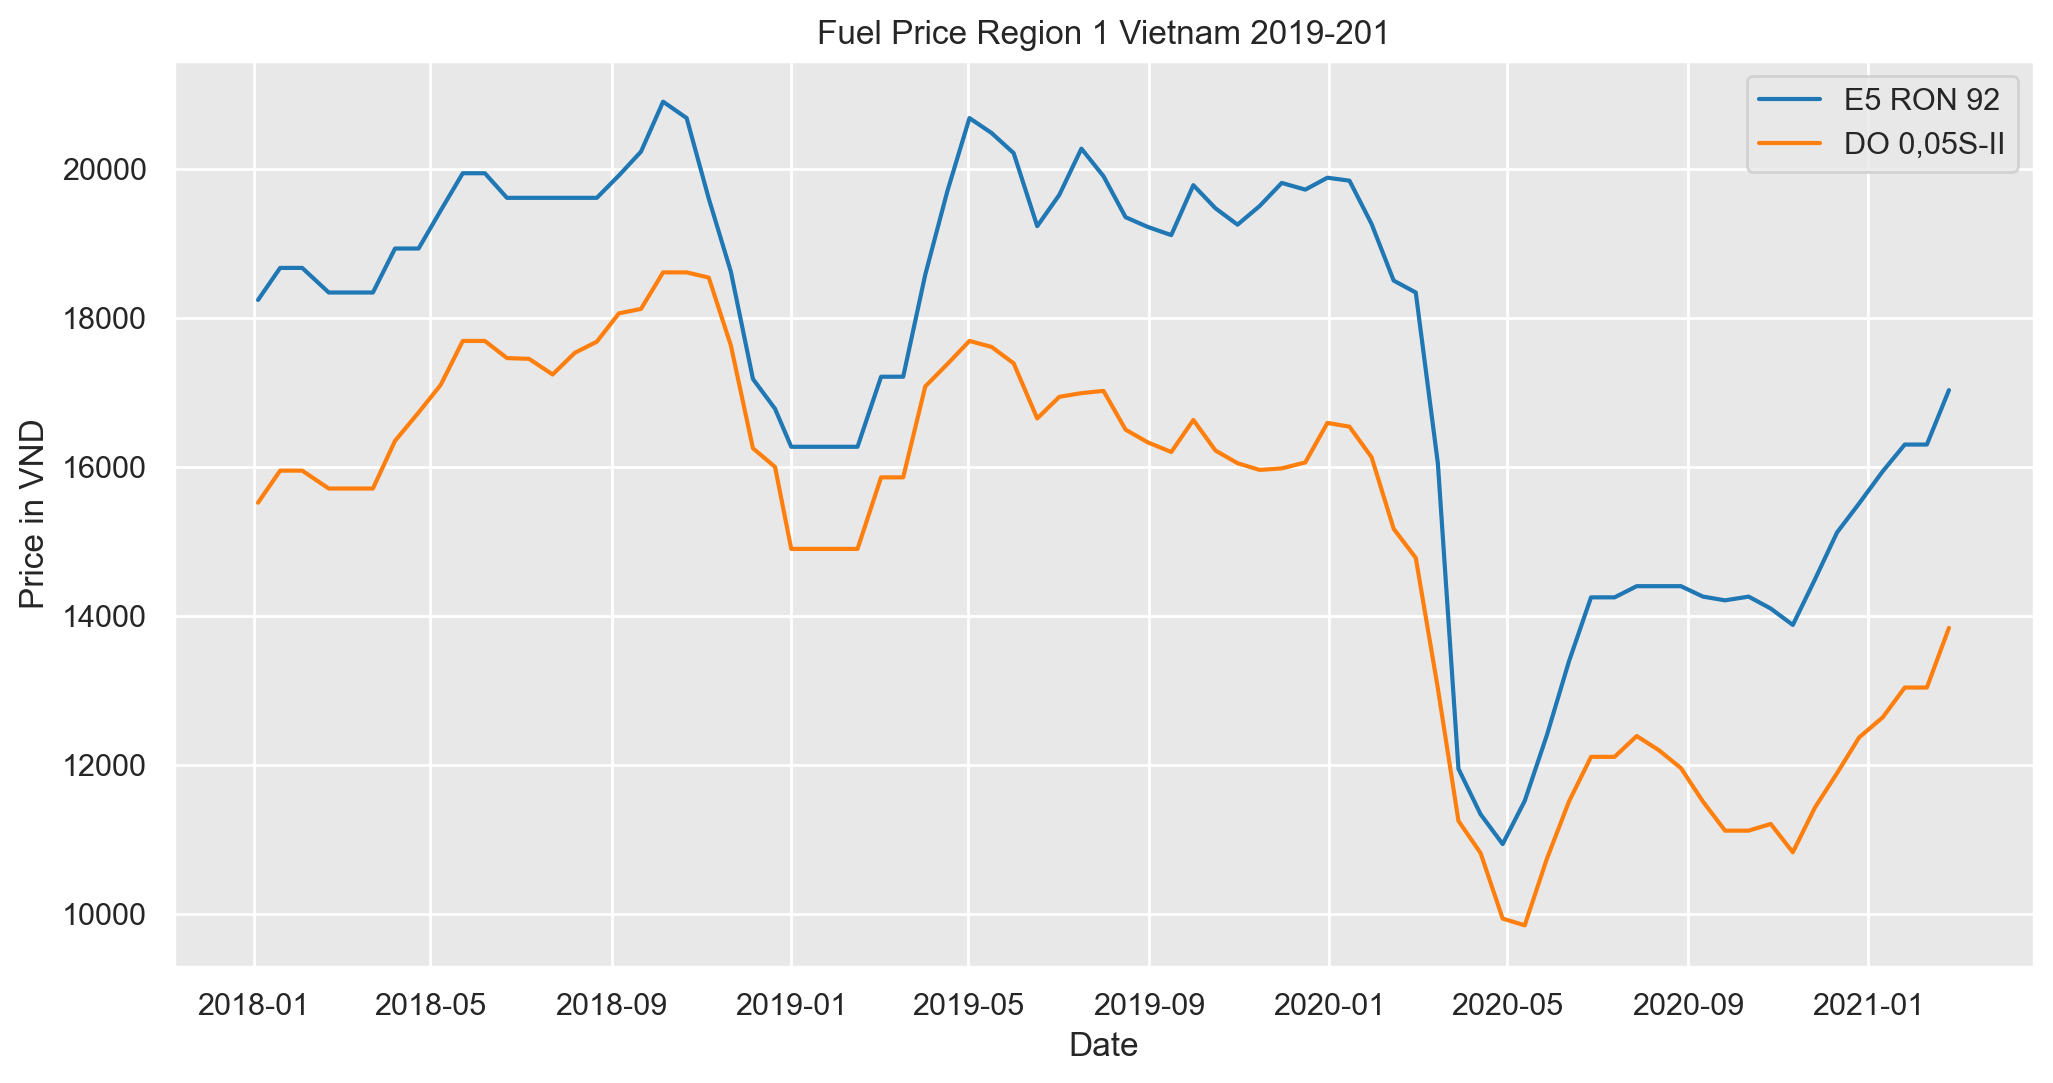

In [3]:
f = plt.figure(figsize=(12,6),dpi=200)
gs = f.add_gridspec(3, 3)
sns.set_context('notebook', font_scale=1)
sns.set_style("darkgrid", {"axes.facecolor": ".91"})


#axe_1 = sns.lineplot(data = fuel_df_reg1, 
                     #x='Date',y='RON 95-IV', label = 'RON 95-IV',
                     #)

axe_1 = sns.lineplot(data = fuel_df_reg1, x='Date',y='E5 RON 92-II', label = 'E5 RON 92')

#axe_1 = sns.lineplot(data = fuel_df_reg1, x='Date',y='Diesel Oil 0,001S-V', label = 'DO 0,001S-V')

axe_1 = sns.lineplot(data = fuel_df_reg1, x='Date',y='Diesel Oil 0,05S-II', label = 'DO 0,05S-II')

axe_1.set(xlabel = 'Date', ylabel = 'Price in VND')

axe_1.set_title('Fuel Price Region 1 Vietnam 2019-201')

In [4]:
fuel_df_reg1.dtypes

Unnamed: 0                    float64
Date                   datetime64[ns]
Regional                       object
RON 95-IV                       int64
RON 95-III                      int64
E5 RON 92-II                    int64
Diesel Oil 0,001S-V             int64
Diesel Oil 0,05S-II             int64
dtype: object

In [5]:
fuel_df_reg1['year'] = fuel_df_reg1['Date'].dt.year


<ipython-input-5-975eff74fe3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_df_reg1['year'] = fuel_df_reg1['Date'].dt.year


In [6]:
fuel_df_reg1.drop('Unnamed: 0',axis=1,inplace = True)
fuel_df_reg1.head()

C:\Users\Phuong.Ngo\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date,Regional,RON 95-IV,RON 95-III,E5 RON 92-II,"Diesel Oil 0,001S-V","Diesel Oil 0,05S-II",year
0,2021-02-25,Vùng 1,18180,18080,17030,14190,13840,2021
2,2021-02-10,Vùng 1,17370,17270,16300,13390,13040,2021
4,2021-01-26,Vùng 1,17370,17270,16300,13390,13040,2021
6,2021-01-11,Vùng 1,17030,16930,15940,12990,12640,2021
8,2020-12-26,Vùng 1,16570,16470,15510,12720,12370,2020


In [7]:
fuel_df_reg1_Boxplot = pd.melt(fuel_df_reg1,id_vars=['year','Date','Regional'],
                               value_vars=['RON 95-IV', 'RON 95-III','E5 RON 92-II',
                               'Diesel Oil 0,001S-V','Diesel Oil 0,05S-II'])
fuel_df_reg1_Boxplot.dtypes

fuel_df_reg1_Boxplot = fuel_df_reg1_Boxplot[(fuel_df_reg1_Boxplot['year'] < 2021) ]
fuel_df_reg1_Boxplot.tail()

,year,Date,Regional,variable,value
380,2018,2018-03-08,Vùng 1,"Diesel Oil 0,05S-II",15710
381,2018,2018-02-21,Vùng 1,"Diesel Oil 0,05S-II",15710
382,2018,2018-02-03,Vùng 1,"Diesel Oil 0,05S-II",15950
383,2018,2018-01-19,Vùng 1,"Diesel Oil 0,05S-II",15950
384,2018,2018-01-04,Vùng 1,"Diesel Oil 0,05S-II",15520


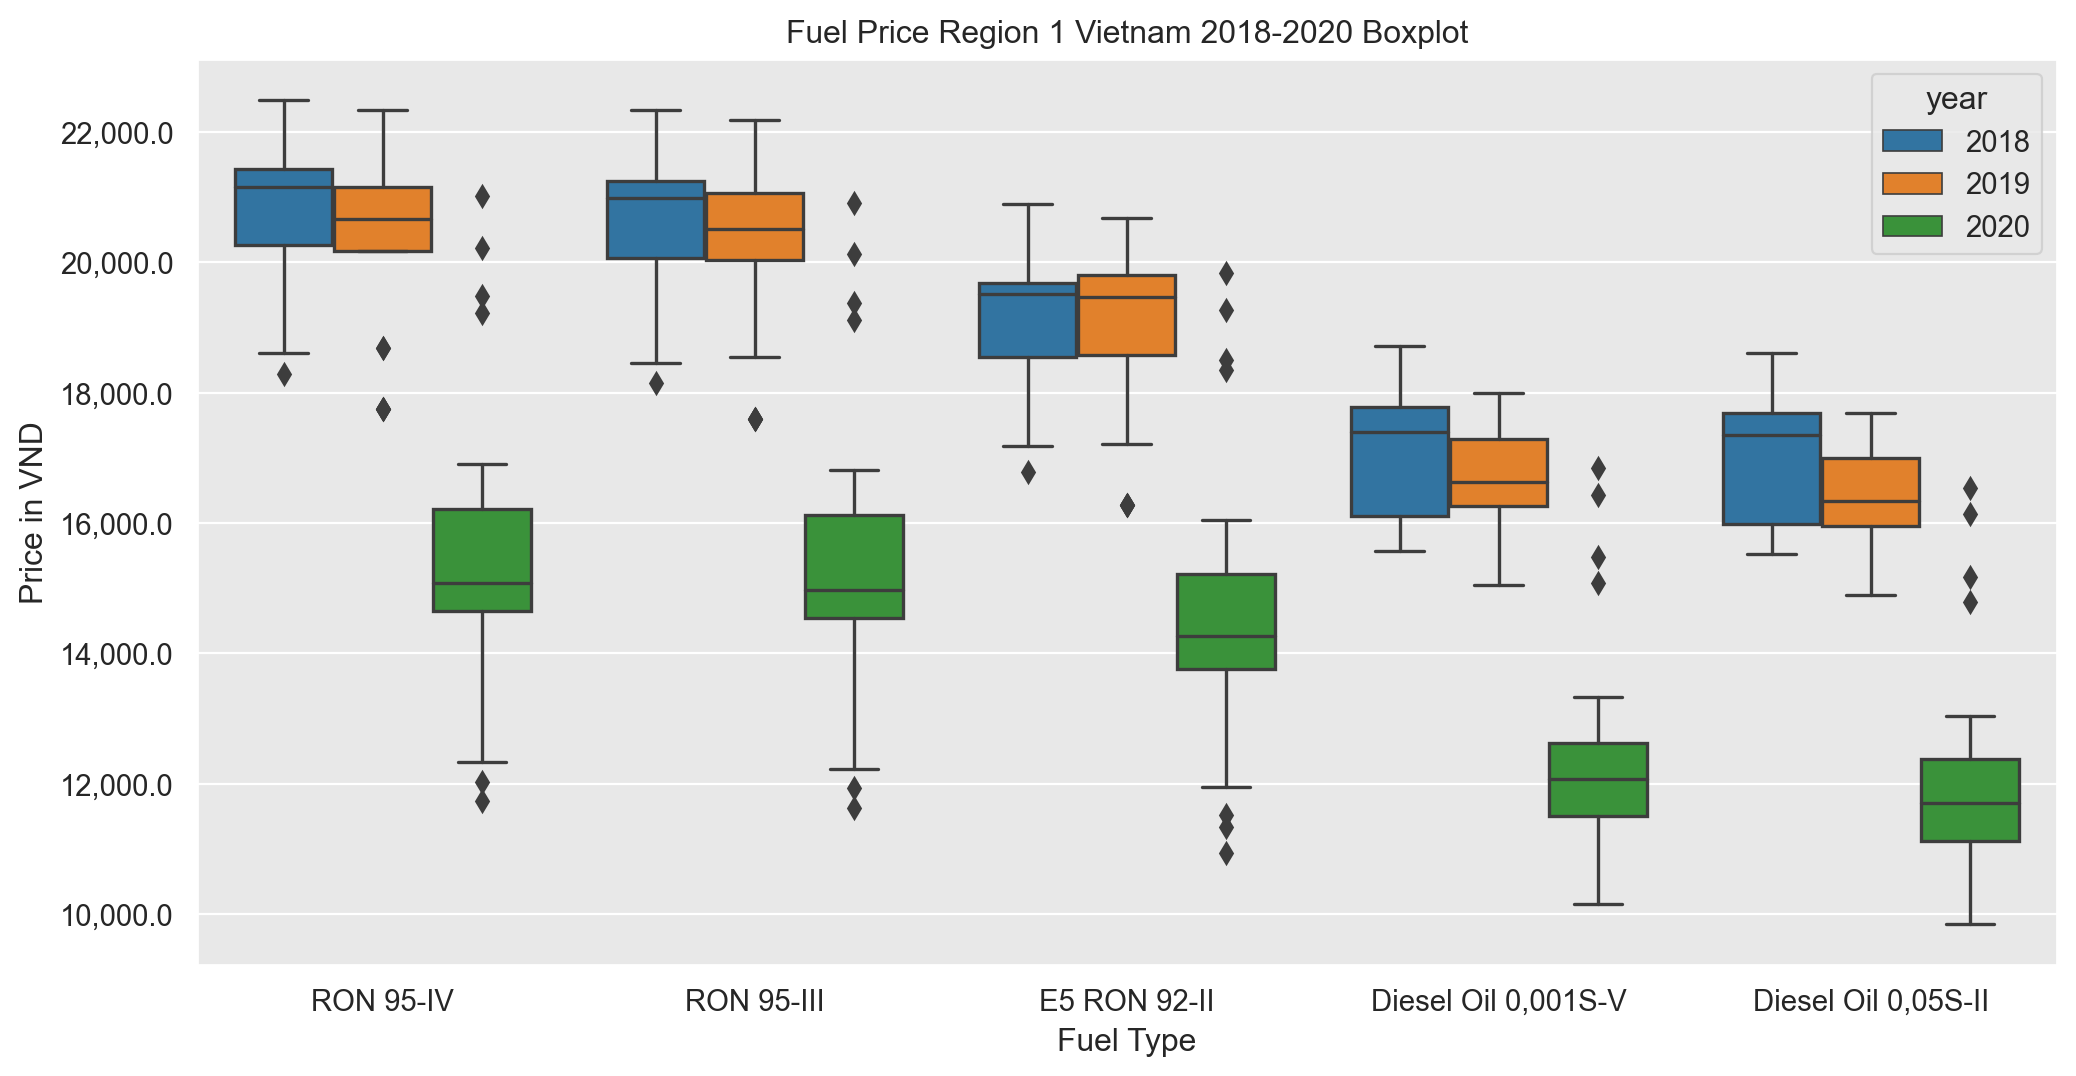

In [8]:
f = plt.figure(figsize=(12,6),dpi=200)
gs = f.add_gridspec(3, 3)
sns.set_context('paper', font_scale=1.2)
sns.set_style("darkgrid", {"axes.facecolor": ".91"})

axe_2 = sns.boxplot(x='variable',y='value',data=fuel_df_reg1_Boxplot, hue='year')

axe_2.set(xlabel = 'Fuel Type', ylabel = 'Price in VND')

#axe_2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

axe_2.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y:,}'))

axe_2.set_title('Fuel Price Region 1 Vietnam 2018-2020 Boxplot')
f.savefig('Fuel Price VN 2018-2020.png')

In [9]:
#fuel_df_reg1['Q'] = fuel_df_reg1['Date'].dt.quarter
fuel_df_reg1['Period'] = fuel_df_reg1['year'].astype(str)+str("-")+fuel_df_reg1['Date'].dt.quarter.astype(str)
fuel_df_reg1.head()
#df_vol['Week_no']= df_vol['datetime'].dt.week
#df_vol['Year_no']= df_vol['datetime'].dt.year
#df_vol['Period'] = df_vol['Year_no'].astype(str) + str("-") + df_vol['Week_no'].astype(str)

<ipython-input-9-7e264c2d9f9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_df_reg1['Period'] = fuel_df_reg1['year'].astype(str)+str("-")+fuel_df_reg1['Date'].dt.quarter.astype(str)


,Date,Regional,RON 95-IV,RON 95-III,E5 RON 92-II,"Diesel Oil 0,001S-V","Diesel Oil 0,05S-II",year,Period
0,2021-02-25,Vùng 1,18180,18080,17030,14190,13840,2021,2021-1
2,2021-02-10,Vùng 1,17370,17270,16300,13390,13040,2021,2021-1
4,2021-01-26,Vùng 1,17370,17270,16300,13390,13040,2021,2021-1
6,2021-01-11,Vùng 1,17030,16930,15940,12990,12640,2021,2021-1
8,2020-12-26,Vùng 1,16570,16470,15510,12720,12370,2020,2020-4


In [19]:
fuel_df_pivot = fuel_df_reg1.pivot_table(fuel_df_reg1,index=["year"])
fuel_df_pivot.head()

,"Diesel Oil 0,001S-V","Diesel Oil 0,05S-II",E5 RON 92-II,RON 95-III,RON 95-IV
year,,,,,
2018,17130.833333,17053.750000,19155.416667,20707.083333,20886.250000
2019,16615.600000,16343.600000,18931.600000,20132.000000,20260.000000
2020,12477.500000,12167.083333,14627.500000,15390.416667,15490.416667
2021,13490.000000,13140.000000,16392.500000,17387.500000,17487.500000


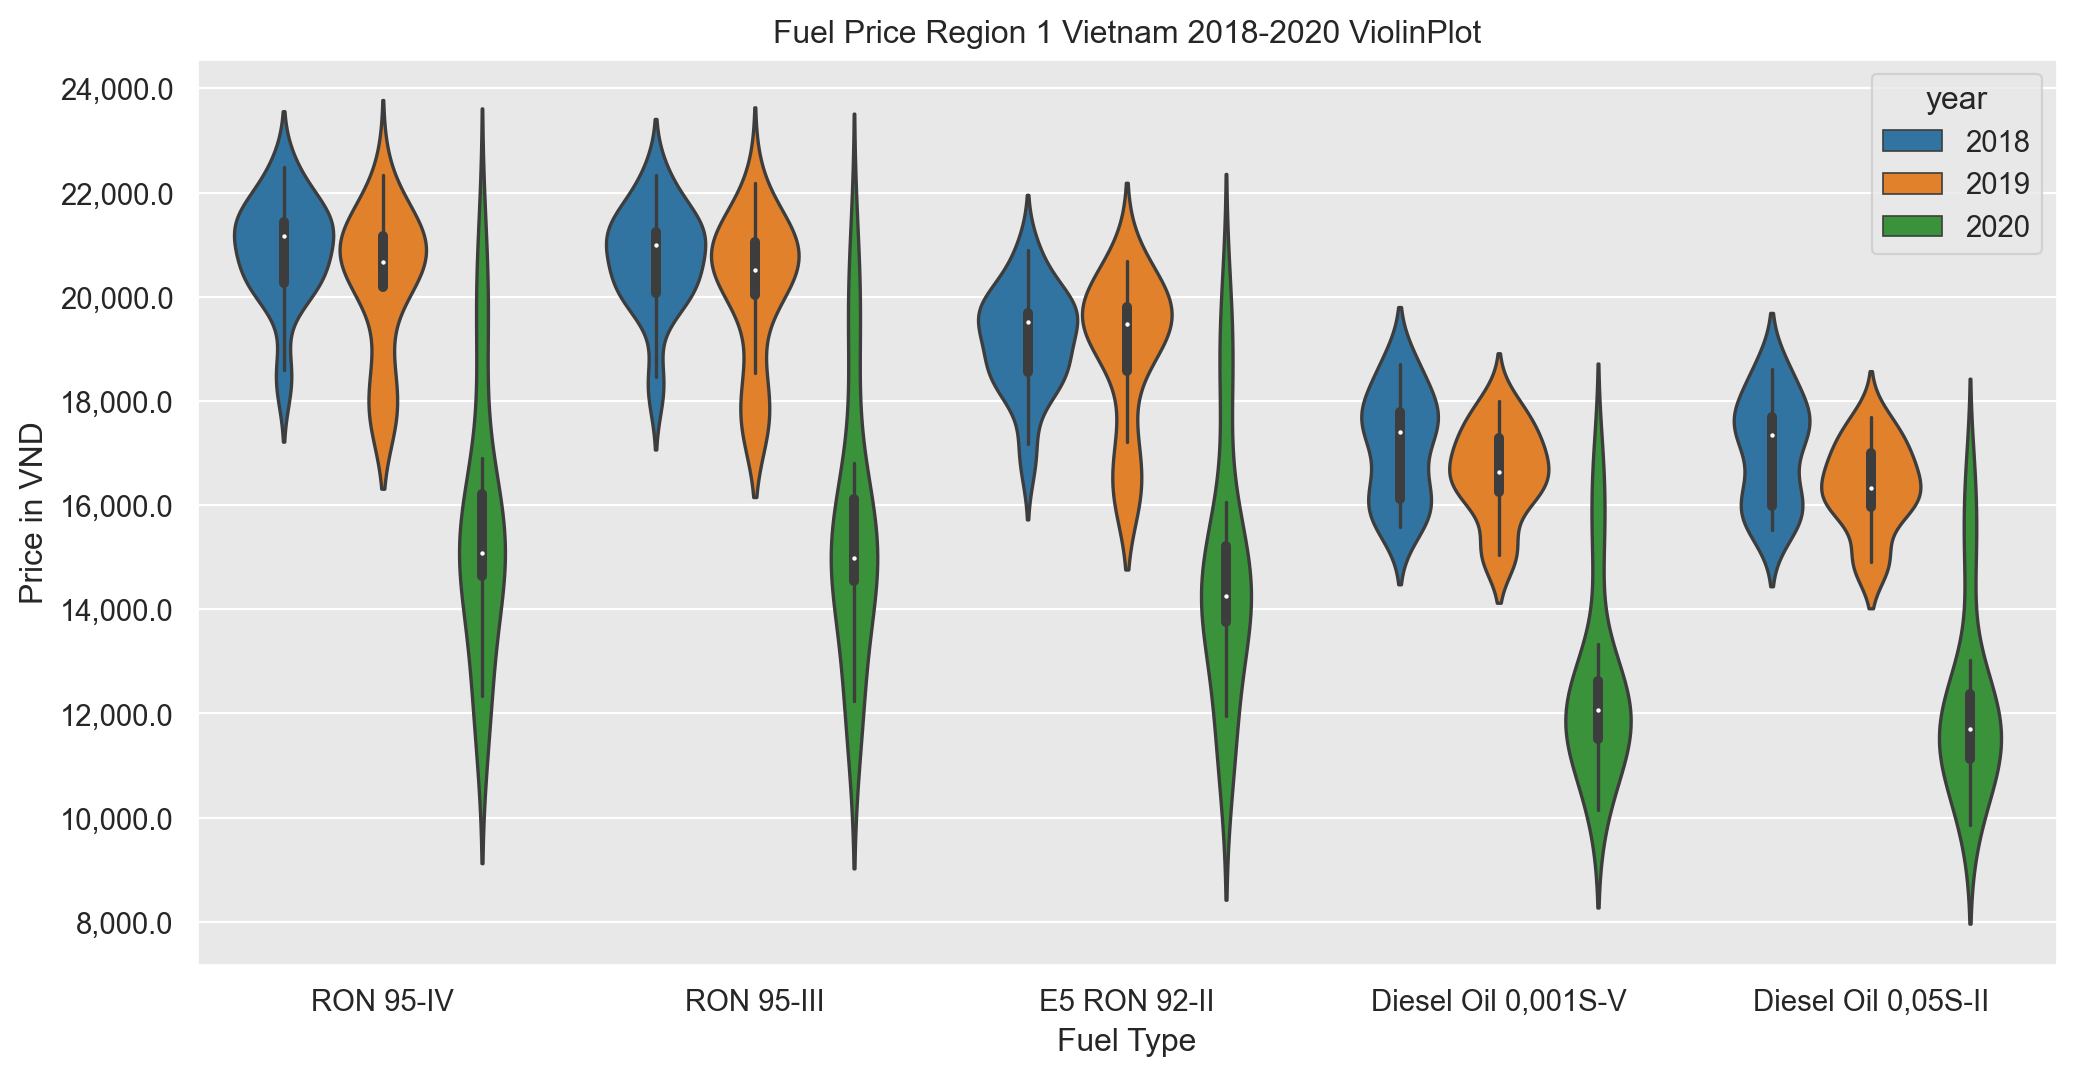

In [11]:
f2 = plt.figure(figsize=(12,6),dpi=200)
gs = f2.add_gridspec(3, 3)
sns.set_context('paper', font_scale=1.2)
sns.set_style("darkgrid", {"axes.facecolor": ".91"})

#sns.violinplot(x='day',y='total_bill',data=tips_df, hue='sex',split=True)
axe_3 = sns.violinplot(x='variable',y='value',data=fuel_df_reg1_Boxplot, hue='year')

axe_3.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y:,}'))

axe_3.set(xlabel = 'Fuel Type', ylabel = 'Price in VND')
axe_3.set_title('Fuel Price Region 1 Vietnam 2018-2020 ViolinPlot')
f2.savefig('Fuel Price VN 2018-2020 Violin.png')